## Import the libreries

In [86]:
# Core
import pandas as pd
import numpy as np
import sklearn
import math

# Tensorflow
import tensorflow
from tensorflow import keras
from keras import layers,models

# Preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE

# Models - Clasificación
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from ipywidgets import interact, widgets
from IPython.display import display, Markdown

## Load Dataset

In [179]:
datasetTrain = pd.read_csv('Data/train.csv')
datasetTest = pd.read_csv('Data/test.csv')

In [180]:
datasetTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Preprocessing dataset


In [181]:
#Eliminamos Cabin por ser mayoritariamente null y Name y ticket ya que no sirve para la prediccion

datasetTrainv1 = datasetTrain.drop(['Name', 'Cabin', 'Ticket'], axis = 1)
datasetTestv1 = datasetTest.drop(['Name', 'Cabin', 'Ticket'], axis = 1)

In [182]:
datasetTestv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [183]:
#label sex

le = LabelEncoder()
datasetTrainv1['Sex'] = le.fit_transform(datasetTrainv1['Sex'])
datasetTestv1['Sex'] = le.fit_transform(datasetTestv1['Sex'])




In [185]:

imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer. fit(datasetTrainv1[['Age']])

datasetTrainv1[['Age']] = imputer.transform(datasetTrainv1[['Age']])

imputer2 = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer2. fit(datasetTestv1[['Age']])

datasetTestv1[['Age']] = imputer.transform(datasetTestv1[['Age']])


In [189]:
imputer3 = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer3.fit(datasetTestv1[['Fare']])

datasetTestv1[['Fare']] = imputer3.transform(datasetTestv1[['Fare']])

In [190]:
#Age to int
datasetTrainv1['Age'] = datasetTrainv1['Age'].astype(int)
datasetTestv1['Age'] = datasetTestv1['Age'].astype(int)

In [191]:
datasetTrainv1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7.2500,S
1,2,1,1,0,38,1,0,71.2833,C
2,3,1,3,0,26,0,0,7.9250,S
3,4,1,1,0,35,1,0,53.1000,S
4,5,0,3,1,35,0,0,8.0500,S


In [192]:
#dumificar Embarked
datasetTrainfinal = pd.get_dummies(datasetTrainv1)
datasetTestfinal = pd.get_dummies(datasetTestv1)

In [193]:
datasetTrainfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    int32  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked_C   891 non-null    uint8  
 9   Embarked_Q   891 non-null    uint8  
 10  Embarked_S   891 non-null    uint8  
dtypes: float64(1), int32(2), int64(5), uint8(3)
memory usage: 51.5 KB


## Matriz de correlacion

In [194]:
def correlacion_matrix(data, column, porcentajeCorrelacion):
  corr_matrix = data.corr()

  top_corr_features = corr_matrix.index[abs(corr_matrix[column]) >= porcentajeCorrelacion]


  plt.figure(figsize=(10, 6))
  sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="coolwarm")

  plt.title(f'Matriz de Correlación de las Variables mas correlacionadas con {column}')
  plt.show()

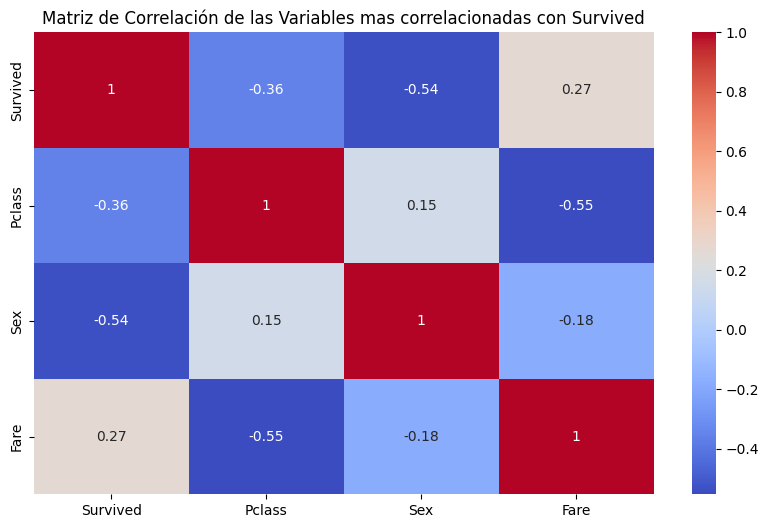

In [12]:
correlacion_matrix(datasetTrainfinal, 'Survived', 0.2)

Variables importatnes Pclass Sex y Fare

## Split the data

In [195]:
#separacion para medir el acierto de los modelos

X = datasetTrainfinal.drop(['Survived','PassengerId'], axis=1)
Y = datasetTrainfinal['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.15, random_state=23)

## Smote

In [196]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, Y_train)

## Select Best Features

In [197]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_smote, y_train_smote)
feature_importances = pd.DataFrame(clf.feature_importances_, index=X_train_smote.columns, columns=['importance'])
selected_features = feature_importances[feature_importances['importance'] > 0.05].index.tolist()

In [198]:
X_train = X_train_smote[selected_features]
X_test = X_test[selected_features]
Y_train = y_train_smote

In [222]:
X_train

,Pclass,Sex,Age,Fare
0,3,1,17,8.662500
1,1,0,40,153.462500
2,3,0,0,19.258300
3,1,1,38,0.000000
4,3,1,28,23.250000
...,...,...,...,...
909,1,0,27,30.651985
910,3,0,18,8.552807
911,2,0,28,12.379153
912,1,0,42,26.176815


## Estandarizar Data

In [199]:
sc= StandardScaler()

X_train_sc= sc.fit_transform(X_train)

X_test_sc= sc.transform(X_test)

# Entrenar Modelo Arboles de Clasificacion

In [200]:
DT= DecisionTreeClassifier()
DT.fit(X_train_sc,Y_train)

DecisionTreeClassifier()

In [201]:
Y_pred1 = DT.predict(X_test)

c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [202]:
print(Y_pred1.astype(int))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [116]:
print(classification_report(Y_test, Y_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        92
           1       0.31      0.98      0.47        42

    accuracy                           0.31       134
   macro avg       0.15      0.49      0.23       134
weighted avg       0.10      0.31      0.15       134



In [117]:
print(accuracy_score(Y_test,Y_pred1))

0.30597014925373134


## Bayes Neives

In [118]:
naive = GaussianNB()
naive.fit(X_train_sc,Y_train)

GaussianNB()

In [119]:
Y_pred2 = naive.predict(X_test_sc)

In [120]:
print(Y_pred2.astype(int))

[1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1
 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0]


In [121]:
print(classification_report(Y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        92
           1       0.67      0.74      0.70        42

    accuracy                           0.81       134
   macro avg       0.77      0.79      0.78       134
weighted avg       0.81      0.81      0.81       134



In [122]:
print(accuracy_score(Y_test,Y_pred2))

0.8059701492537313


# KNN

In [132]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train_sc, Y_train)


KNeighborsClassifier(n_neighbors=6)

In [133]:
Y_pred3 = knn.predict(X_test_sc)

In [134]:
print(Y_pred3.astype(int))

[1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0]


In [135]:
print(classification_report(Y_test, Y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        92
           1       0.66      0.69      0.67        42

    accuracy                           0.79       134
   macro avg       0.76      0.76      0.76       134
weighted avg       0.79      0.79      0.79       134



In [136]:
print(accuracy_score(Y_test,Y_pred3))

0.7910447761194029


## Random Forest

In [137]:
randonBosque = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
randonBosque.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [138]:
Y_pred4 = randonBosque.predict(X_test)

In [139]:
print(Y_pred4)

[1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0]


In [140]:
print(classification_report(Y_test, Y_pred4))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        92
           1       0.69      0.74      0.71        42

    accuracy                           0.81       134
   macro avg       0.78      0.79      0.79       134
weighted avg       0.82      0.81      0.82       134



In [141]:
print(accuracy_score(Y_test,Y_pred4))

0.8134328358208955


# Logistic Regression

In [142]:
logReg = LogisticRegression(random_state = 0)
logReg.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [143]:
Y_pred5 = logReg.predict(X_test)

In [144]:
print(Y_pred5)

[1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1
 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1]


In [145]:
print(classification_report(Y_test, Y_pred5))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81        92
           1       0.59      0.71      0.65        42

    accuracy                           0.75       134
   macro avg       0.72      0.74      0.73       134
weighted avg       0.77      0.75      0.76       134



In [146]:
print(accuracy_score(Y_test,Y_pred5))

0.753731343283582


## Deep Learning

In [147]:
NEURONAS = 8

model = keras.models.Sequential([
    keras.layers.Dense(NEURONAS, activation = 'relu', input_shape = X_train_sc.shape[1:]),
    keras.layers.Dense(4, activation = 'relu'),
    keras.layers.Dense(2, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [148]:
model.compile(optimizer = 'Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [149]:
model.fit(X_train_sc, Y_train, epochs =300)

Epoch 1/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4525 - loss: 0.6965
Epoch 2/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5285 - loss: 0.6785
Epoch 3/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6413 - loss: 0.6636
Epoch 4/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7182 - loss: 0.6438 
Epoch 5/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7201 - loss: 0.6204 
Epoch 6/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7658 - loss: 0.5938 
Epoch 7/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7822 - loss: 0.5648 
Epoch 8/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7916 - loss: 0.5292 
Epoch 9/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8171 - loss: 0.4927 
Epoch 10/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7715 - loss: 0.5028 
Epoch 11/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7871 - loss: 0.4768 
Epoch 12/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

In [150]:
Y_pred6 = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [151]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred6)
roc_auc = auc(fpr, tpr)

In [152]:
print(roc_auc_score(Y_test,Y_pred6))

0.32453416149068326


In [153]:
Y_pred6_rounde = (Y_pred6 >= roc_auc_score(Y_test,Y_pred6)).astype(int)

In [154]:
print(classification_report(Y_test, Y_pred6_rounde))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        92
           1       0.00      0.00      0.00        42

    accuracy                           0.69       134
   macro avg       0.34      0.50      0.41       134
weighted avg       0.47      0.69      0.56       134



c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [155]:
print(accuracy_score(Y_test,Y_pred6_rounde))

0.6865671641791045


Conclusion Mejor modelo Random Forest

In [156]:
X_train

,Pclass,Sex,Age,Fare
0,3,1,17,8.662500
1,1,0,40,153.462500
2,3,0,0,19.258300
3,1,1,38,0.000000
4,3,1,28,23.250000
...,...,...,...,...
909,1,0,27,30.651985
910,3,0,18,8.552807
911,2,0,28,12.379153
912,1,0,42,26.176815


In [233]:
#Separacion para probar test

X_test_Final = datasetTestfinal[['Pclass','Sex','Age','Fare']]

In [234]:
Y_pred_Final = randonBosque.predict(X_test_Final)

In [235]:
datafinal = pd.DataFrame(Y_pred_Final)

In [236]:
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


In [237]:
datafinal.columns = ['Survived']

In [238]:
print(datafinal)

     Survived
0           0
1           0
2           1
3           1
4           0
..        ...
413         0
414         1
415         0
416         0
417         0

[418 rows x 1 columns]


In [239]:
print(datasetTestfinal['PassengerId'])

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64


In [240]:
datafinal_concatenada = pd.concat([datasetTestfinal['PassengerId'], datafinal['Survived']], axis=1)

In [241]:
print(datafinal_concatenada)

     PassengerId  Survived
0            892         0
1            893         0
2            894         1
3            895         1
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [242]:
datafinal_concatenada.to_csv('Data/predict.csv', index=False)